# Try `pyGIMLi` interactively.
For more information visit <http://www.pygimli.org> and have a look at the tutorials and examples.

In [5]:
%matplotlib inline
import pygimli as pg

In [11]:
print(pg.__version__)

0+unknown


## Modelling with boundary conditions

We use the preceding example (Poisson equation on the unit square) but want to specify different boundary conditions on the four sides. Again, we first import numpy and pygimli, the solver and post processing functionality. We create a 50x50 node grid to solve on.

In [13]:
grid = pg.createGrid(x=np.linspace(-1.0, 1.0, 21),
                     y=np.linspace(-1.0, 1.0, 21))

We start considering inhomogeneous Dirchlet boundary conditions (BC). There are different ways of specifying BCs. They can be maps from markers to values, explicit functions or implicit (lambda) functions.

The boundary 1 (top) and 2 (left) are directly mapped to the values 1 and 2. On side 3 (bottom) a lambda function 3+x is used (p is the boundary position and p[0] its x coordinate. On side 4 (right) a function uDirichlet is used that simply returns 4 in this example but can compute anything as a function of the individual boundaries b.

In [14]:
def uDirichlet(b):
    """
        Return a solution value for coordinate p.
    """
    return 4.0

dirichletBC = [[1, 1.0],                                    # left
               [grid.findBoundaryByMarker(2), 2.0],         # right
               [grid.findBoundaryByMarker(3),
                lambda p: 3.0 + p.center()[0]],  # top
               [grid.findBoundaryByMarker(4), uDirichlet]]  # bottom

The BC are passed using the uBoundary keyword. Note that showMesh returns the created figure axes ax while drawMesh plots on it and it can also be used as a class with plotting or decoration methods.

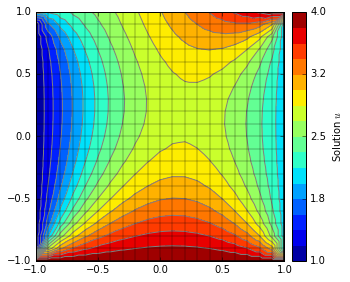

(-1.1, 1.1)

In [18]:
u = pg.solve(grid, f=1., uB=dirichletBC)

ax = pg.show(grid, data=u, colorBar=True,
          orientation='vertical', label='Solution $u$',
          levels=np.linspace(1.0, 4.0, 17), hold=1)[0]

pg.show(grid, axes=ax)

ax.text(0, 1.01, '$u=3+x$', ha='center')
ax.text(-1.01, 0, '$u=1$', va='center', ha='right', rotation='vertical')
ax.text(0, -1.01, '$u=4$', ha='center', va='top')
ax.text(1.02, 0, '$u=2$', va='center', ha='left',  rotation='vertical')

ax.set_title('$\\nabla\cdot(1\\nabla u)=1$')

ax.set_xlim([-1.1, 1.1])  # some boundary for the text
ax.set_ylim([-1.1, 1.1])